# PA 1: Exploratory Analysis over Federal Emergencies and Disasters

## Student Details

#### Team Names and ID:

Student Name and ID: Sai Rohith Pasala; 1001873156

Student Name and ID: Sri Naga Venkata Pavan Kalyan Sirigibattula; 1001886149

Student Name and ID: Rutvik Naga Sai Dondapati; 1001879177

Notes:
When submitting, fill your name and ID in this cell. Note that this is a markdown cell!
Do not make any changes in the dataset file and do not rename the 'database.csv'.
Rename your submission file to <b> 'yourLastName_Last4digitsofyourID_PA1.ipynb' </b>.
Do not to forget to cite any external sources used by you.
[2.5 points]

reference: https://github.com/


## Assignment Details

In this assignment, you will conduct a guided exploration over the Federal Emergencies and Disasters dataset. You will learn and use some of the most common exploration/aggregation/descriptive operations. This should also help you learn most of the key functionalities in Pandas.

You will also learn how to use visualization libraries to identify patterns in data that will help in your further data analysis. You will also explore most popular chart types and how to use different libraries and styles to make your visualizations more attractive.

## Dataset Details

In this assignment, you will work on 63 years of Federal Disasters dataset. Specifically, you will work on database.csv file from kaggle repository (https://www.kaggle.com/fema/federal-disasters). The file database.csv contains 46,184 rows and 14 columns. This dataset begins with the year 1953, and runs up to the year 2017. Each row corresponds to an emergency declared by the president due to a natural disaster all around the US. The columns of the data-set are:
- Declaration Number - Unique number for each emergency declared
- Declaration Type - Type of declaration
- Declaration Date - Date of declaration
- State - State affected
- County - County affected
- Disaster Type 
- Disaster Title
- Start Date - The date event started
- End Date - The date event ended
- Close Date - End of Declaration
- Individual Assistance Program - Whether IAP was provided or not?
- Individuals & Households Program - Whether IHP was provided or not?
- Public Assistance Program - Whether PAP was provided or not?
- Hazard Mitigation Program - Whether HMP was provided or not?


## Required Python Packages
You will use the packages imported below in this assignment. 
Do NOT import any new packages without confirming with the TA. 

In [ ]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

#Array processing
import numpy as np
#Data analysis, wrangling and common exploratory operations
import pandas as pd
from pandas import Series, DataFrame

#For visualization. Matplotlib for basic viz and seaborn for more stylish figures
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# install plotly for all the graphs in this notebook
!pip install plotly

# Reading Dataset
The Python code below reads the Federal Emergencies and Disasters dataset into a Pandas data frame with the name df_data. 
For this code to work, the file 'database.csv' must be in the same folder as this file.

In [3]:
#read the csv file into a Pandas data frame
df_data = pd.read_csv('database.csv', encoding='latin1')

#return the first 5 rows of the dataset
df_data.head()

,Declaration Number,Declaration Type,Declaration Date,State,County,Disaster Type,Disaster Title,Start Date,End Date,Close Date,Individual Assistance Program,Individuals & Households Program,Public Assistance Program,Hazard Mitigation Program
0,DR-1,Disaster,5/2/1953,GA,NaN,Tornado,Tornado,5/2/1953,5/2/1953,6/1/1954,Yes,No,Yes,Yes
1,DR-2,Disaster,5/15/1953,TX,NaN,Tornado,Tornado and Heavy Rainfall,5/15/1953,5/15/1953,1/1/1958,Yes,No,Yes,Yes
2,DR-3,Disaster,5/29/1953,LA,NaN,Flood,Flood,5/29/1953,5/29/1953,2/1/1960,Yes,No,Yes,Yes
3,DR-4,Disaster,6/2/1953,MI,NaN,Tornado,Tornado,6/2/1953,6/2/1953,2/1/1956,Yes,No,Yes,Yes
4,DR-5,Disaster,6/6/1953,MT,NaN,Flood,Floods,6/6/1953,6/6/1953,12/1/1955,Yes,No,Yes,Yes


# Task 1: Statistical Exploratory Data Analysis
Let us start with getting to know the dataset. Your first task will be to get some basic information by using Pandas features.

In [4]:
#For each task below, look for a Pandas function to do the task.
#Replace None in each task with your code.

# 2.5 points
#Task 1-a: Print the details of the df_data data frame (information such as number of rows,columns, name of columns, etc)
print (">>Task 1-a: Details of df_data data frame are: \n", df_data.info() ) #code syntax to print 

# 2.5 points
#Task 1-b: Find the number of rows and columns in the df_data data frame.
num_rows = len(df_data)
num_cols = len(df_data.columns)
print ("\n\n>>Task 1-b: Number of rows:%s and number of columns:%s" % (num_rows, num_cols)) #code syntax to print 

# 2.5 points
#Task 1-c: Print the descriptive detail (count, unique, top, freq etc) for 'Start Date' column of the df_data 

print ("\n\n>>Task 1-c: Descriptive details of 'Start Date' column are\n",df_data['Start Date'].describe()) #code syntax to print 

# 10 points
#Task 1-d: Print ALL the unique values of Disaster Title and Counties  .
disaster_title_list  = list(df_data['Disaster Title'].unique())
unique_county_list = list(df_data['County'].unique())

print ("\n\n >>Task 1-d:")   #code syntax to print 
print(disaster_title_list)    #code syntax to print 
print("#####################################################")  #code syntax to print 
print(unique_county_list)   #code syntax to print 



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46185 entries, 0 to 46184
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Declaration Number                46185 non-null  object
 1   Declaration Type                  46185 non-null  object
 2   Declaration Date                  46185 non-null  object
 3   State                             46185 non-null  object
 4   County                            45988 non-null  object
 5   Disaster Type                     46185 non-null  object
 6   Disaster Title                    46185 non-null  object
 7   Start Date                        46185 non-null  object
 8   End Date                          45843 non-null  object
 9   Close Date                        35210 non-null  object
 10  Individual Assistance Program     46185 non-null  object
 11  Individuals & Households Program  46185 non-null  object
 12  Public Assistance 

# Task 2: Aggregation & Filtering & Rank
In this task, we will perform some very high level aggregation and filtering operations. 
Then, we will apply ranking on the results for some tasks. 
Pandas has a convenient and powerful syntax for aggregation, filtering, and ranking. 
DO NOT write a for loop. Pandas has built-in functions for all tasks. 

In [6]:
# 8 points
#Task 2-a: Find out the declaration titles of type 'Emergency' which lasted more than 120 days

df_data['Start Date'] = pd.to_datetime(df_data['Start Date'])    #Start date varible is being stored to dataframe df
df_data['End Date'] = pd.to_datetime(df_data['End Date'])        #End date varible is being stored to dataframe df
df_data['Declaration Date'] = pd.to_datetime(df_data['Declaration Date'])  #Declaration date varible is being stored to dataframe df

Emergency_greater_120 = ", ".join(list(df_data[(df_data['End Date'] - df_data['Start Date']).dt.days > 120][df_data['Declaration Type'] == 'Emergency']['Disaster Title'].unique()))
print (">>Task 2-a: The declaration titles of type 'Emergency' which lasted more than 120 days are %s" 
       % (Emergency_greater_120))   #code syntax  to print days >120

# 8 points
#Task 2-b: Find out the total number of declarations between 1998 and 1999 where Individual Assistance Program was provided for the state of Texas.
#

num_declarations_1998_1999 = len(df_data[(df_data['State'] == 'TX') & (df_data['Declaration Date'].dt.year.isin( [1998,1999])) & (df_data['Individual Assistance Program'] == 'Yes')])

print ("\n\n>>Task 2-b: The total number of declarations in 1998-1999 for the state of Texas were %s" 
       % (num_declarations_1998_1999))

# 14 points
#Task 2-c: Find out the top 10 counties with the declaration type 'Disaster' and 'Emergency' for all years.


n = 10
top10_disasters="\n".join(list(df_data[df_data['Declaration Type'].isin(['Disaster'])]['County'].value_counts().index[:n]))  #Syntax for using join and check declaration type vs disaster and county
top10_emergencies="\n".join(list(df_data[df_data['Declaration Type'].isin(['Emergency'])]['County'].value_counts().index[:n]))  #Syntax for using join and check declaration type vs Emergency and county
print ("\n\n>>Task 2-c: top 10 counties with the most disasters for all years are: \n%s" % (top10_disasters))
print ("\n\n>>Task 2-c: top 10 counties with the most emergencies for all years are: \n%s" % (top10_emergencies))




>>Task 2-a: The declaration titles of type 'Emergency' which lasted more than 120 days are Extreme  Fire Hazard, Fire, Extreme Fire Hazards, West Nile Virus, Drought, Wildfires


>>Task 2-b: The total number of declarations in 1998-1999 for the state of Texas were 322


>>Task 2-c: top 10 counties with the most disasters for all years are: 
Washington County
Jefferson County
Jackson County
Franklin County
Lincoln County
Clay County
Madison County
Montgomery County
Monroe County
Marion County


>>Task 2-c: top 10 counties with the most emergencies for all years are: 
Washington County
Franklin County
Jackson County
Jefferson County
Montgomery County
Monroe County
Lincoln County
Madison County
Marion County
Warren County


<ipython-input-6-60adfd1ee8ed>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Emergency_greater_120 = ", ".join(list(df_data[(df_data['End Date'] - df_data['Start Date']).dt.days > 120][df_data['Declaration Type'] == 'Emergency']['Disaster Title'].unique()))


# Task 3: Visualization
In this task, you will perform a number of visualization tasks to get some intuition about the data. Visualization is a key component of exploration. You can choose to use either Matplotlib or Seaborn for plotting. The default figures generated from Matplotlib may look unaesthetic and so you might want to try Seaborn to get better figures. Seaborn has a variety of styles. Feel free to experiment with them and choose the one you like. We have assigned 10 points for the aesthetics of your visualizations.

In [ ]:
sns.set_style('whitegrid')
sns.set(font_scale = 1.3)

# 10 points
# Task 3-a: Plot the declaration count for each state . 
# Think of a way to nicely visualize all the states! 
#########################begin code for Task 3-a
import plotly.graph_objects as go
df1 = df_data['State'].value_counts()
df = pd.DataFrame(data=df1.index, columns=['State'])
df['Count'] = df1.values

list1 = []

for state in df1.index:
    disasters = df_data[df_data['State'] == state]
    disasters = ",".join([i for i in df_data['Disaster Type'].value_counts().index[0:3]])
    list1.append('Disasters ' + '<br>' + \
    'Mostly: ' + disasters)

df.loc[:,'text'] = list1


for col in df.columns:
    df[col] = df[col].astype(str)

fig = go.Figure(data=go.Choropleth(
    locations=df['State'],
    z=df['Count'].astype(float),
    locationmode='USA-states',
    colorscale='Reds',
    autocolorscale=False,
    text=df['text'], # --hover text display
    marker_line_color='white', # color and line markers between states code
    colorbar_title="Count"
))

fig.update_layout(
    title_text='United States Fedeal Disaster Declarations Count<br>(1953-2017)',
    geo = dict(
        scope='usa',
        projection=go.layout.geo.Projection(type = 'albers usa'),   #projection in figure attribute 
        showlakes=True, # lakes attributefor figure
        lakecolor='rgb(255, 255, 255)'),
)

fig.show()

#------------------------end code for Task 3-a--------------------------------------

# 20 points
# Task 3-b: Draw a pie chart that represents Declaration type.
#########---------------------begin code for Task 3-b------------------------------------------ 

df = df_data['Declaration Type'].value_counts()
fig = go.Figure(data=[go.Pie(textposition='inside', textinfo='percent+label', hole=.3, labels=df.index, values=df.values)])
fig.update_layout(title_text='Declaration Type')
fig.show()

#-------------------------------------end code for Task 3-b----------------------------

# Task 4: 
Find out an 'interesting' information from the dataset. Create a visualization for it and explain in a few lines your reasoning. 

This task is worth 20 points. Your result will be judged based on the uniqueness and quality of your work (having a meaningful result and an aesthetic visualization). 

In [ ]:
# #########################begin code for Task 4
years = range(1953,2018)
disasters = list(df_data['Disaster Type'].unique())
df = []
for disaster in disasters:
  for year in years:
    count = len(df_data[(df_data['Disaster Type'] == disaster) & (df_data['Declaration Date'].dt.year == year)])
    df.append([year, disaster, count])
df = pd.DataFrame(df, columns=['year','disaster type', 'count'])

import plotly.express as px
fig = px.line(df, x="year", y="count", color='disaster type', title='Disaster declarations per year')
fig.show()

# #########################end code for Task 4

The above graph shows, Disaster types summed over year and averaged out to get line graph, hover mouse over to get more details.



# Using Weka




## Below are some screenshots using the weka visualizer for given dataset.



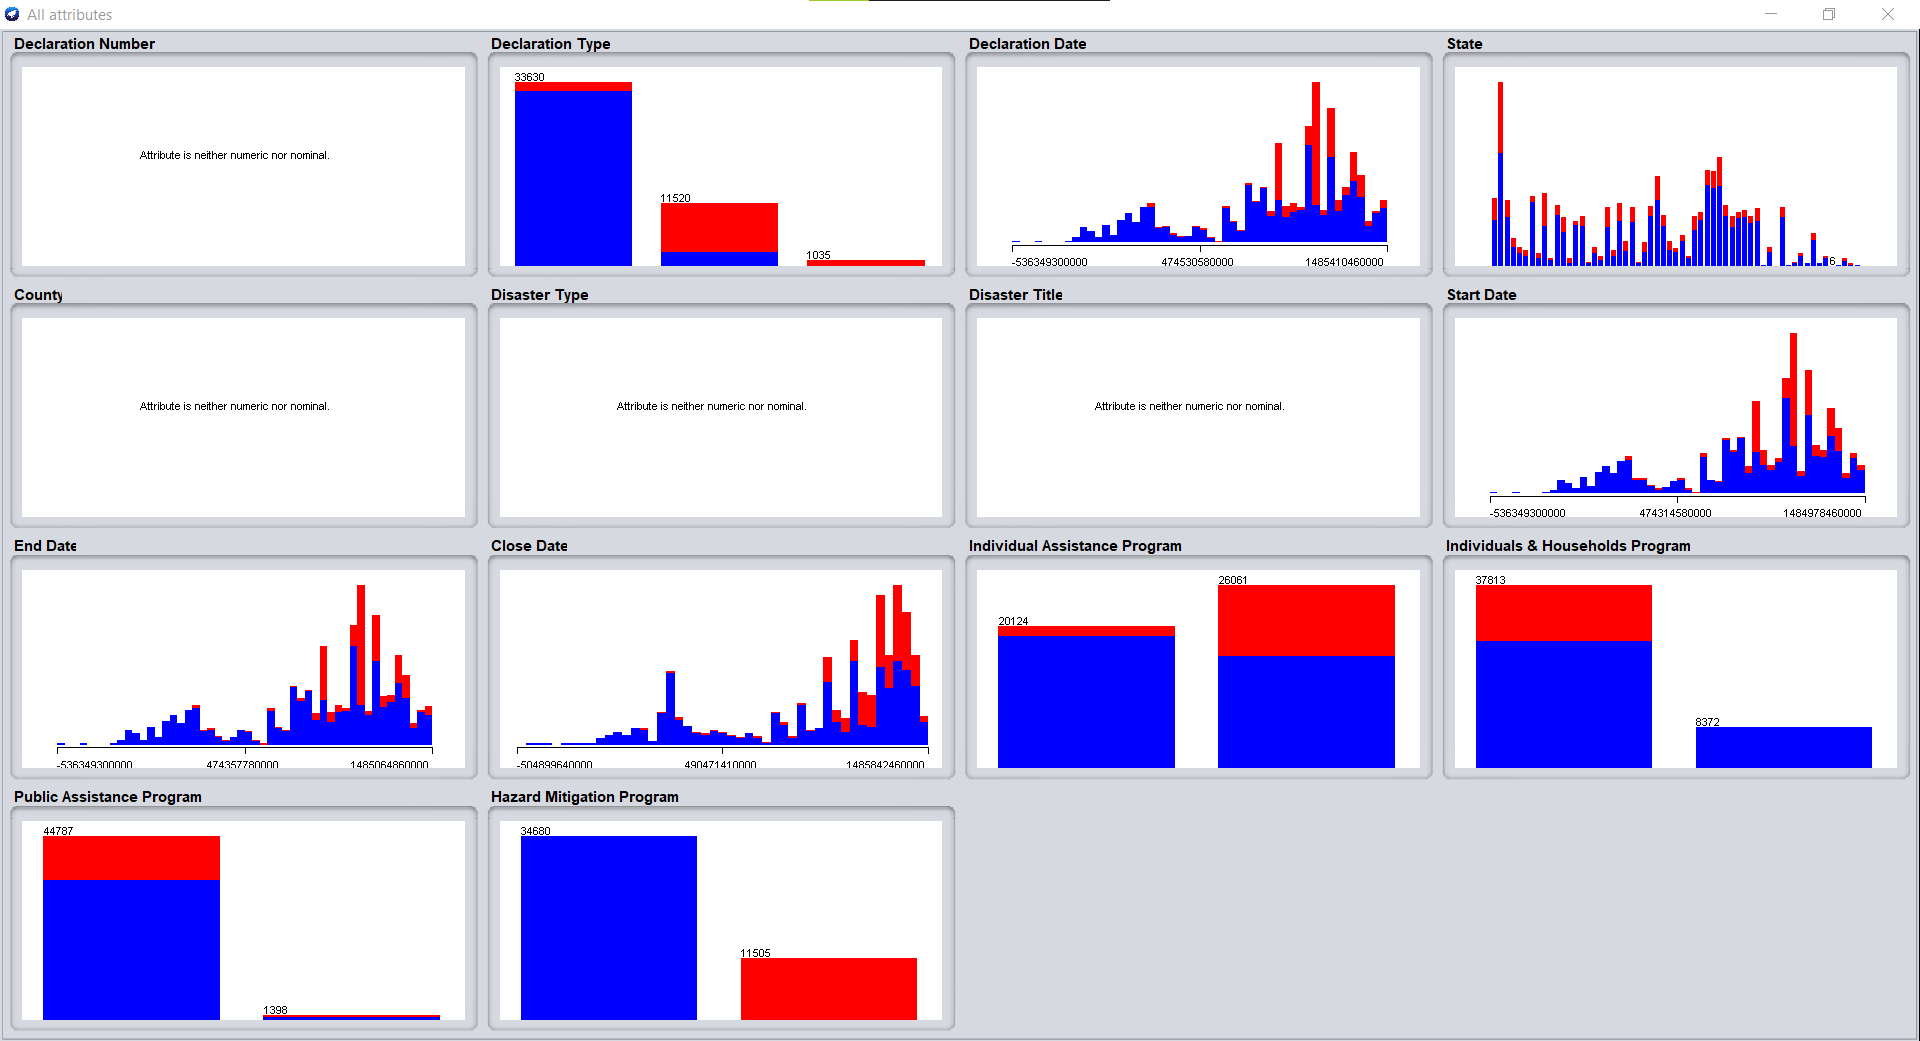

## Disaster Types over time using weka

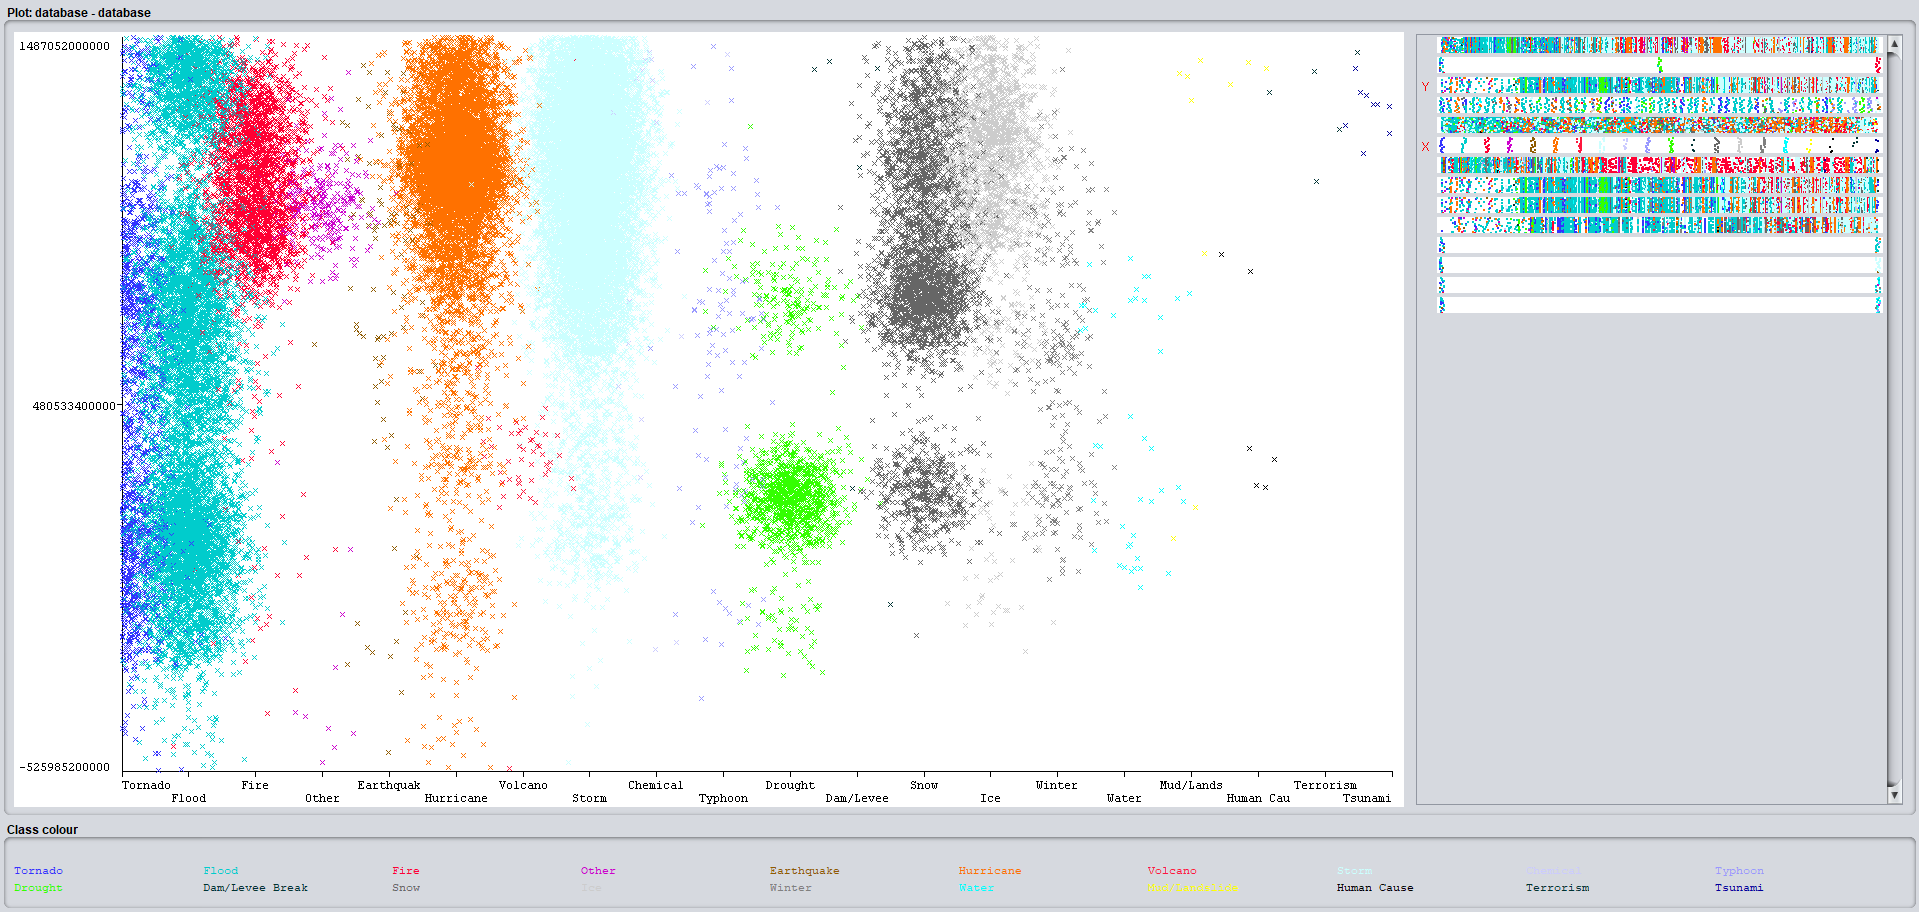

It is evident to see that we are observing more water, Storm, Flood, Hurricane related disasters recently and it's been a while, since mankind has seen any drought.